In [1]:
!pip install gdown
import gdown
gdown.download('https://storage.googleapis.com/datasets_ai/Bas%D0%B5Unit/1_intro/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [1]:
!ls

NN_0_X.ipynb  hw_pro  hw_pro.zip


In [4]:
!unzip -q hw_pro

In [5]:
!ls

Untitled.ipynb	hw_pro	hw_pro.zip


In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

%matplotlib inline

# Open Files From Folder

In [15]:
base_dir = 'hw_pro'
x_train = []
y_train = []
img_height = 20
img_width = 20
for patch in os.listdir(base_dir):
    for img in os.listdir(base_dir + '/' + patch):
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size = (img_height, img_width),
                                                        color_mode = 'grayscale')))
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)

            
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)

(102, 20, 20, 1) (102,)


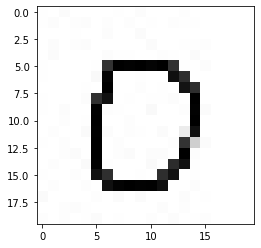

In [16]:
plt.imshow(x_train[2].reshape(20, 20), cmap = 'gray')
plt.show()

In [17]:
x_train = x_train.reshape(x_train.shape[0], -1)
print(x_train.shape)

(102, 400)


In [18]:
x_train = x_train.astype('float32') / 255
y_train = utils.to_categorical(y_train, 2)

In [21]:
model = Sequential()
model.add(Dense(1000, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.00001), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, verbose = 1, validation_split = 0.1, batch_size = 10, shuffle = True)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 1.3141 - accuracy: 0.4505 - val_loss: 0.1226 - val_accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9216 - accuracy: 0.4505 - val_loss: 0.2685 - val_accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7344 - accuracy: 0.5165 - val_loss: 0.4958 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6317 - accuracy: 0.7033 - val_loss: 0.6165 - val_accuracy: 0.8182
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6154 - accuracy: 0.6813 - val_loss: 0.7085 - val_accuracy: 0.5455
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6098 - accuracy: 0.6703 - val_loss: 0.7381 - val_accuracy: 0.3636
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6044 - accuracy: 0.6374 - val_loss: 0.7147 - val_accuracy: 0.5455
Epoch 8/100

10/10 [==============================] - 0s 16ms/step - loss: 0.3083 - accuracy: 1.0000 - val_loss: 0.3515 - val_accuracy: 1.0000
Epoch 59/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3052 - accuracy: 1.0000 - val_loss: 0.3742 - val_accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 0s 16ms/step - loss: 0.3025 - accuracy: 1.0000 - val_loss: 0.3653 - val_accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2987 - accuracy: 1.0000 - val_loss: 0.3414 - val_accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2963 - accuracy: 1.0000 - val_loss: 0.3257 - val_accuracy: 1.0000
Epoch 63/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2939 - accuracy: 1.0000 - val_loss: 0.3289 - val_accuracy: 1.0000
Epoch 64/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2900 - accuracy: 1.0000 - val_loss: 0.3317 - val_accuracy: 1.0000
Epoch 65/100

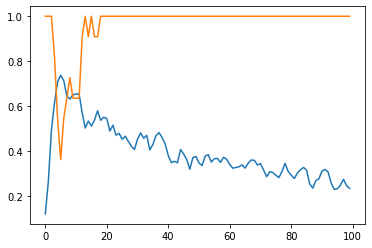

In [24]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.show()

# GG
## Val_Accuracy 1.0